In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221214_junk_wed.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df


,created_at,text,author_id,username
0,2022-12-15 01:00:00,#fumou954,89400309,kogarasumaru0
1,2022-12-15 01:00:00,#fumou954,342791662,JUKE0914
2,2022-12-15 01:00:00,#fumou954,1273098105483919363,soy_sauce_bean
3,2022-12-15 01:00:00,#fumou954,950635523223121920,detarame_radio
4,2022-12-15 01:00:00,#fumou954,952845624159776768,TacoTue_King
...,...,...,...,...
508,2022-12-15 03:00:52,「水曜JUNK 山里亮太の不毛な議論」今日はこれまで！また来週！（ポッドキャストもあるよ！）...,220574156,fumou954
509,2022-12-15 03:01:08,お疲れ様でしたー #fumou954,1160549139949580289,takeshi_atmark
510,2022-12-15 03:03:41,山里さん、お疲れ樣でした。 #fumou954,14360739,kazura
511,2022-12-15 03:04:13,12/14㈬#あちこちオードリー #乃木坂46ANN #SPYのボスの正体は佐久間宣行 #f...,1007964998327386114,Virtlaud1cres


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-15 01:00:00,69
1,2022-12-15 01:01:00,23
2,2022-12-15 01:02:00,16
3,2022-12-15 01:03:00,3
4,2022-12-15 01:04:00,2
...,...,...
120,2022-12-15 03:00:00,12
121,2022-12-15 03:01:00,1
122,2022-12-15 03:02:00,0
123,2022-12-15 03:03:00,1


In [4]:
filename =  "count_221214_junk_wed.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(69, 0)

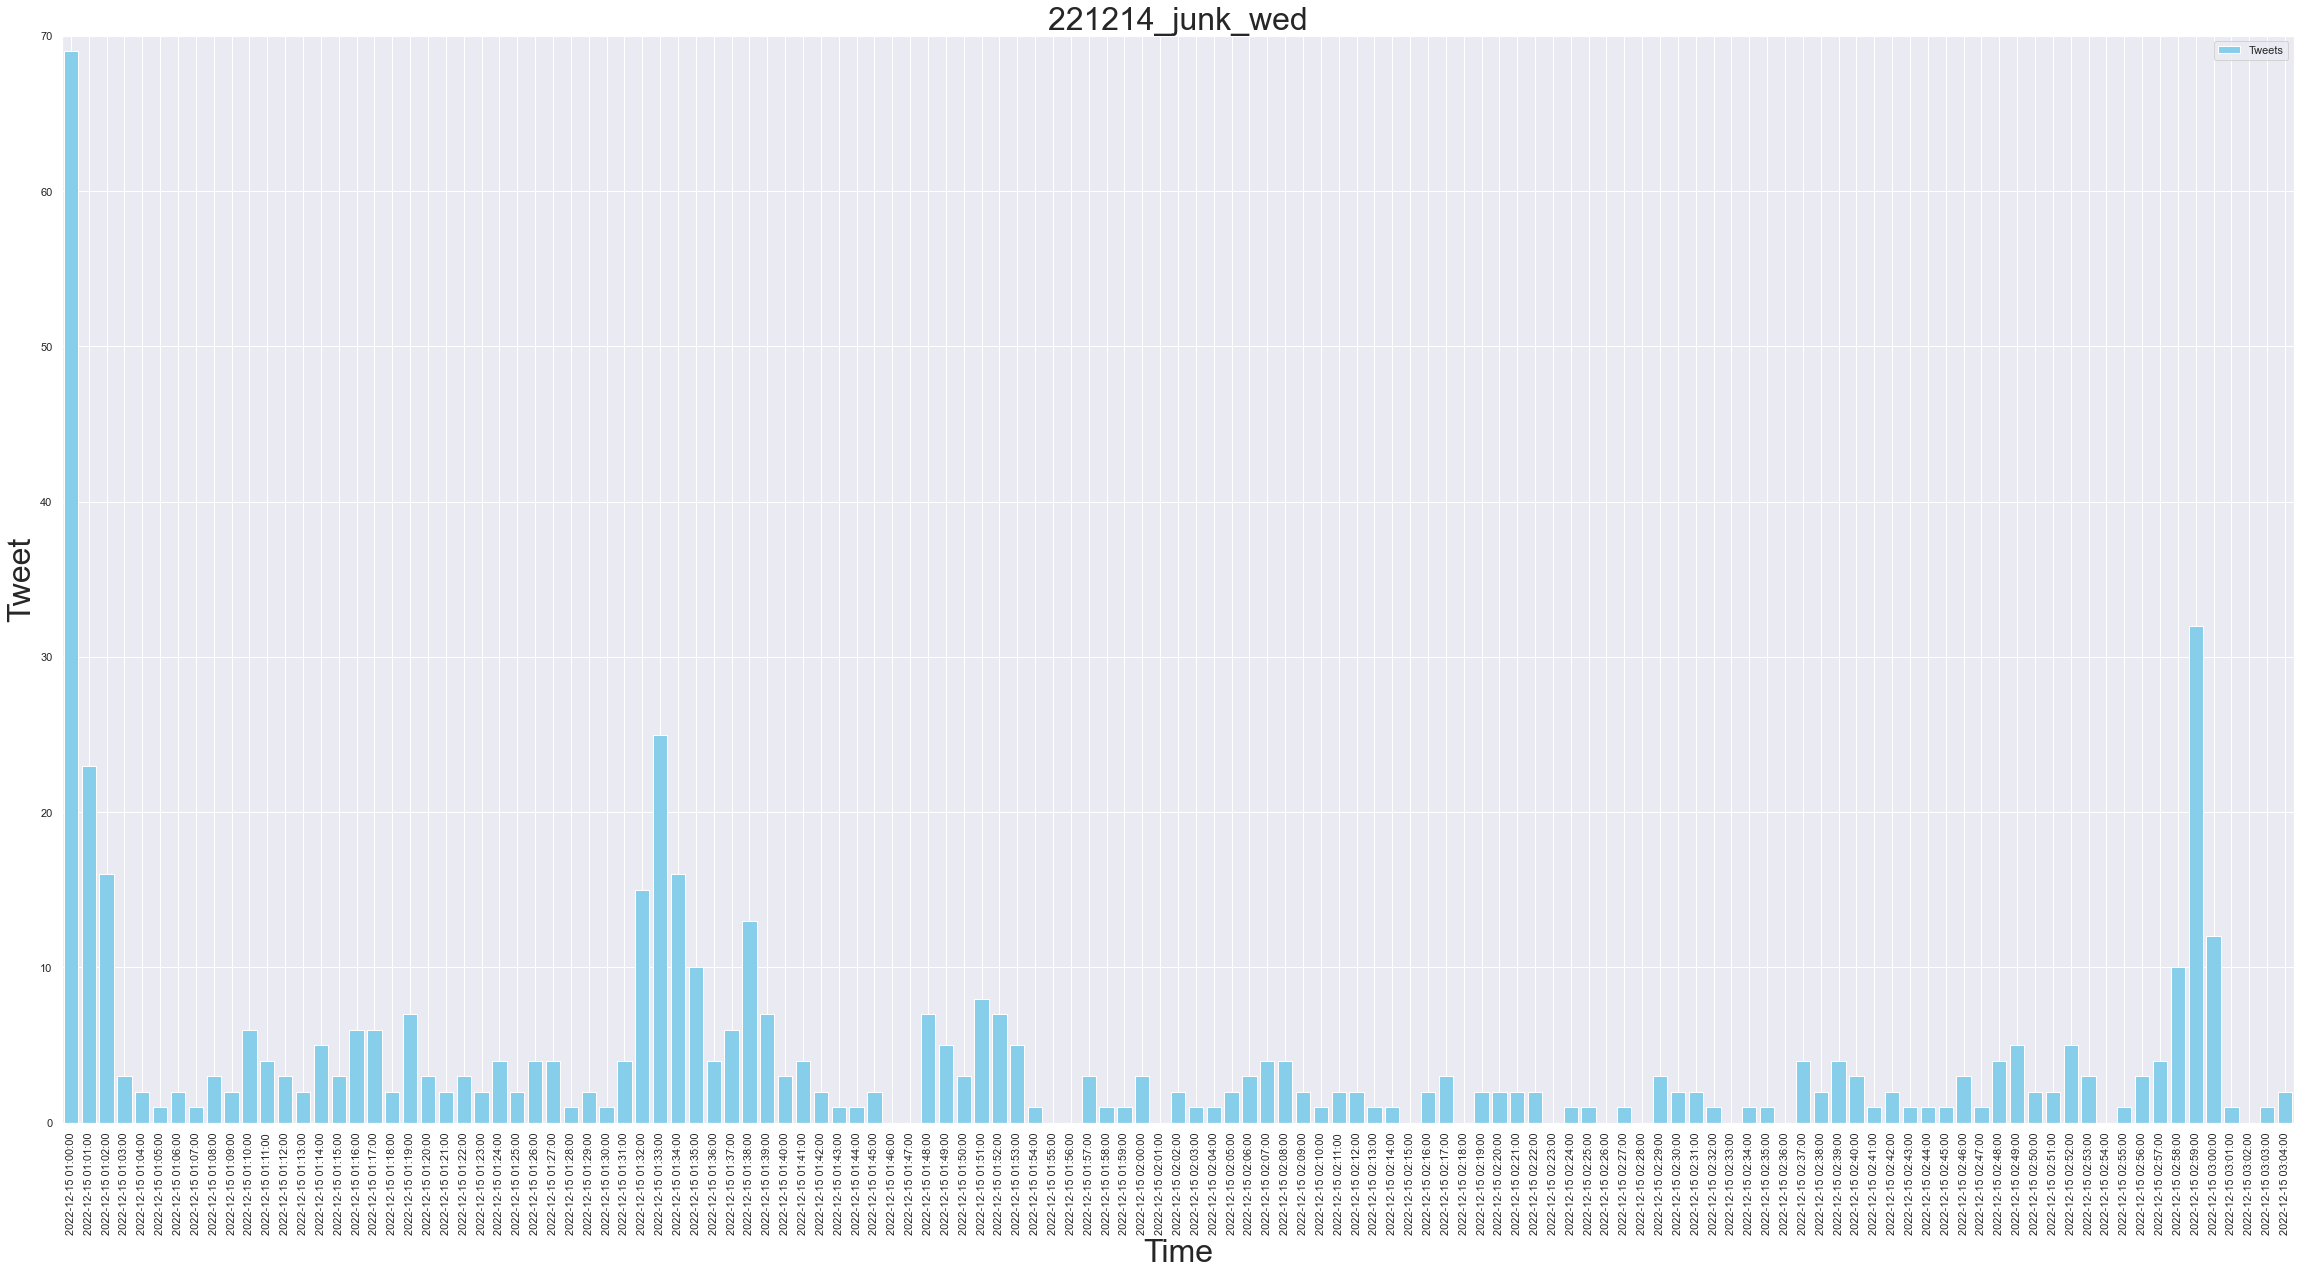

In [6]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221214_junk_wed", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 70) # y軸の範囲を指定する
start = 0
end = 71
stepsize = 10
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")